1. First we load the csv files where the positive test and the negative test results are stored for each animal.

In [1]:
import matplotlib.pyplot as plt
import numpy
import csv

# Change the path to csv file appropriately
beaver_positive_csv = '/Users/ishanhanda/Documents/NYU_Fall16/Comp_Vision/Project/ProjectWorkspace/DataSets/OUTPUTS/Beaver.csv'
beaver_negative_csv = '/Users/ishanhanda/Documents/NYU_Fall16/Comp_Vision/Project/ProjectWorkspace/DataSets/OUTPUTS/Beaver_neg.csv'

def get_data_from_file(file_name):
    print('Loading from file' + file_name)
    reader = csv.reader(open(file_name,"rt"))
    temp = list(reader)
    return numpy.array(temp).astype('float')

positive_data = get_data_from_file(beaver_positive_csv)
positive_length = len(positive_data)
print('Beaver positive test samples count: {}'.format(positive_length))        

negative_data = get_data_from_file(beaver_negative_csv)
negative_length = len(negative_data)
print('Beaver negative test samples count: {}'.format(negative_length))         

Loading from file/Users/ishanhanda/Documents/NYU_Fall16/Comp_Vision/Project/ProjectWorkspace/DataSets/OUTPUTS/Beaver.csv
Beaver positive test samples count: 51
Loading from file/Users/ishanhanda/Documents/NYU_Fall16/Comp_Vision/Project/ProjectWorkspace/DataSets/OUTPUTS/Beaver_neg.csv
Beaver negative test samples count: 51


2. Now we need to define the threshold points over which the ROC will be plotted.

In [2]:
# Here we are defining preset threshold levels for which TPR and FPR values will be calculated
thresholds = numpy.arange(0.0,1.0,0.05)
print('Thresholds: {}'.format(thresholds))

Thresholds: [ 0.    0.05  0.1   0.15  0.2   0.25  0.3   0.35  0.4   0.45  0.5   0.55
  0.6   0.65  0.7   0.75  0.8   0.85  0.9   0.95]


    Now calculating TPR and FNR for the first positive test



PLOTTING ROC FOR CASE: 0


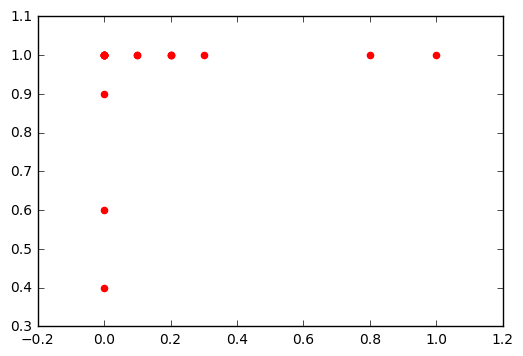



PLOTTING ROC FOR CASE: 1


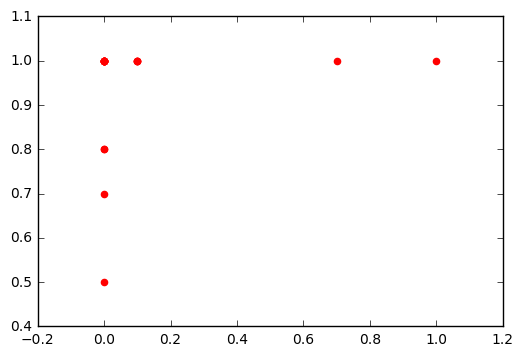



PLOTTING ROC FOR CASE: 2


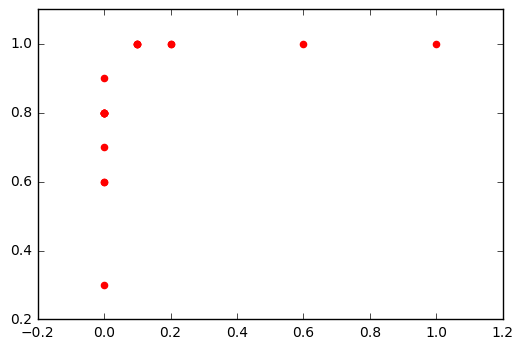



PLOTTING ROC FOR CASE: 3


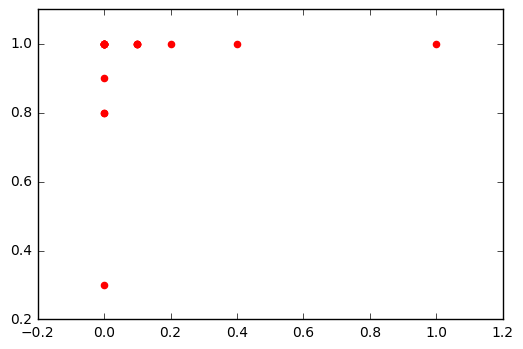



PLOTTING ROC FOR CASE: 4


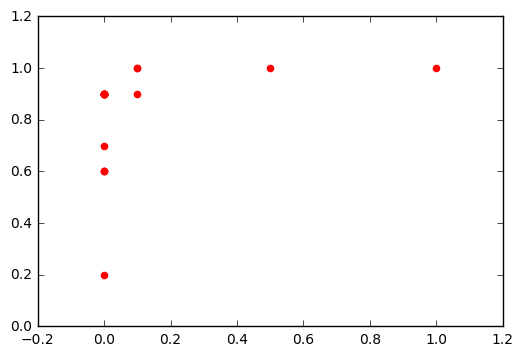



PLOTTING ROC FOR CASE: 5


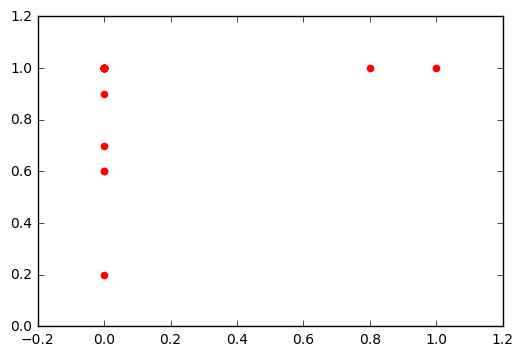



PLOTTING ROC FOR CASE: 6


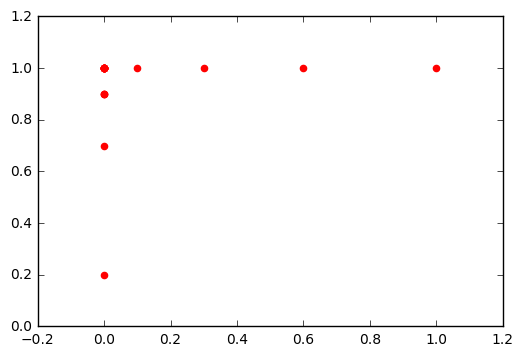



PLOTTING ROC FOR CASE: 7


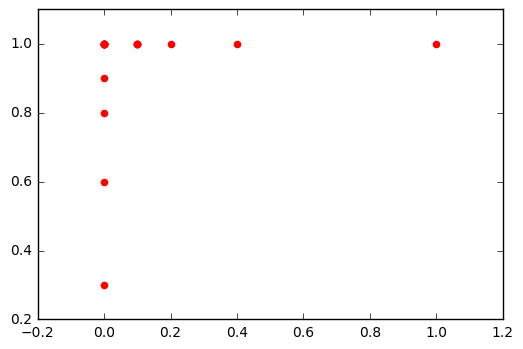



PLOTTING ROC FOR CASE: 8


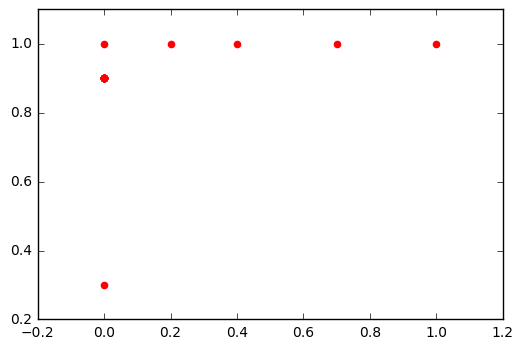



PLOTTING ROC FOR CASE: 9


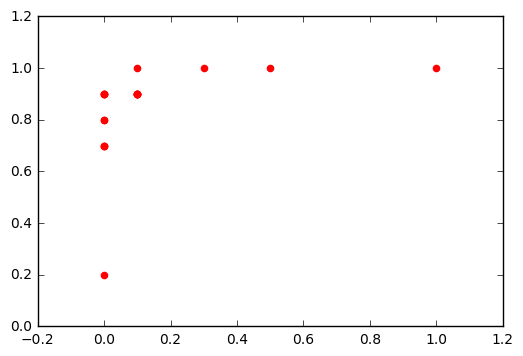



PLOTTING ROC FOR CASE: 10


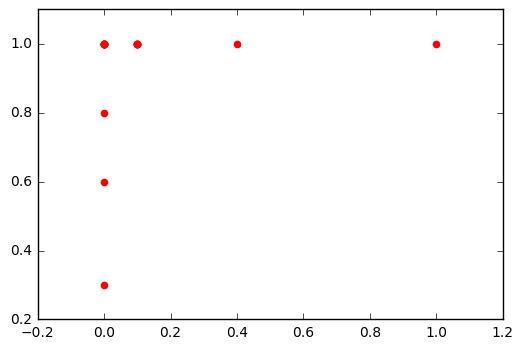



PLOTTING ROC FOR CASE: 11


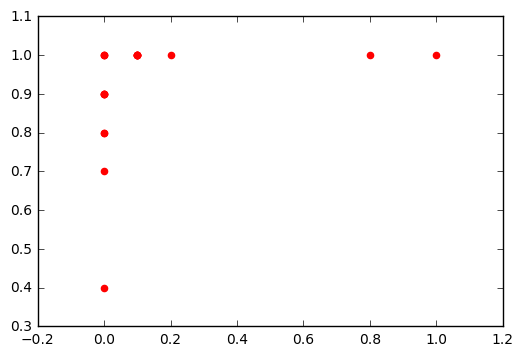



PLOTTING ROC FOR CASE: 12


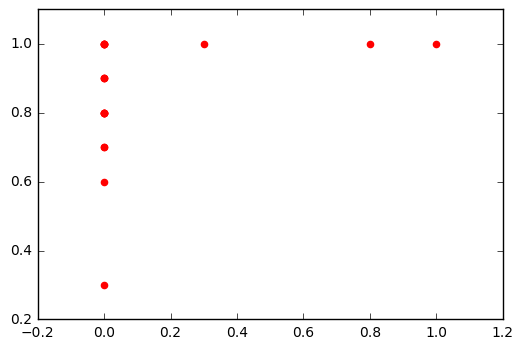



PLOTTING ROC FOR CASE: 13


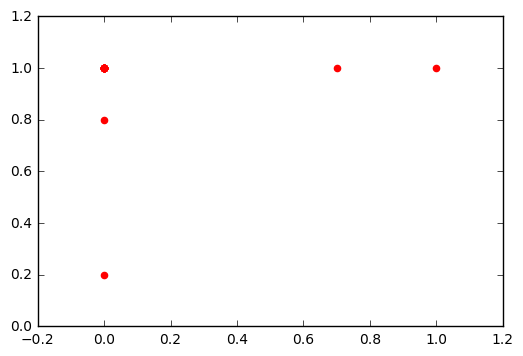



PLOTTING ROC FOR CASE: 14


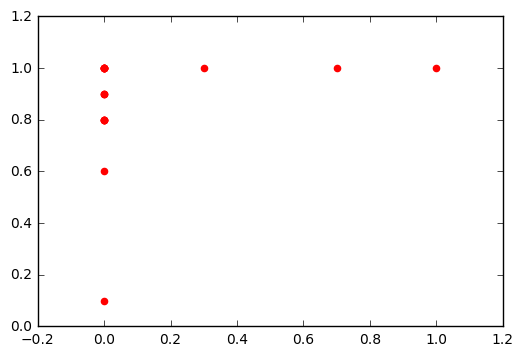



PLOTTING ROC FOR CASE: 15


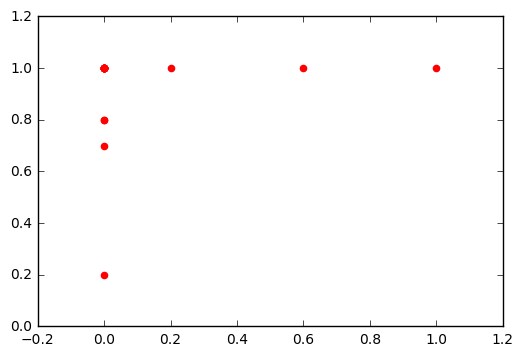



PLOTTING ROC FOR CASE: 16


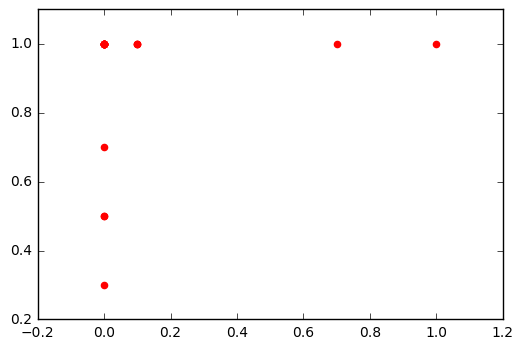



PLOTTING ROC FOR CASE: 17


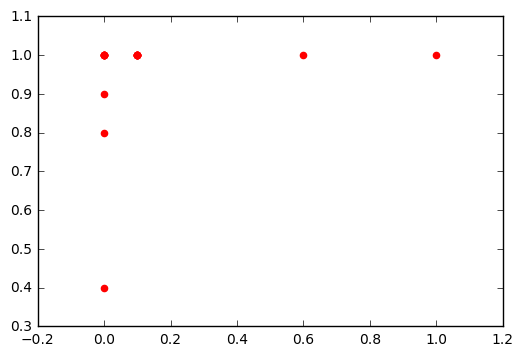



PLOTTING ROC FOR CASE: 18


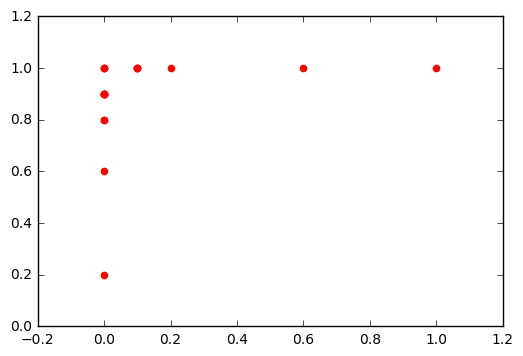



PLOTTING ROC FOR CASE: 19


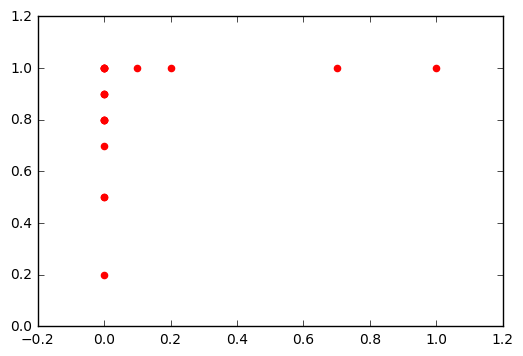



PLOTTING ROC FOR CASE: 20


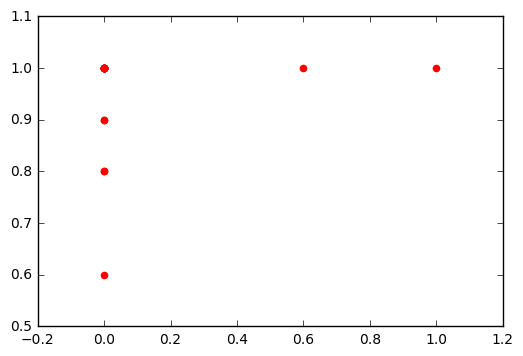



PLOTTING ROC FOR CASE: 21


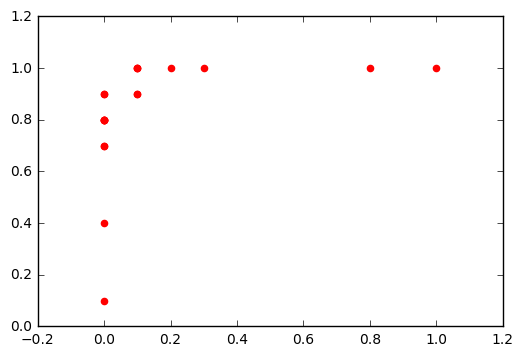



PLOTTING ROC FOR CASE: 22


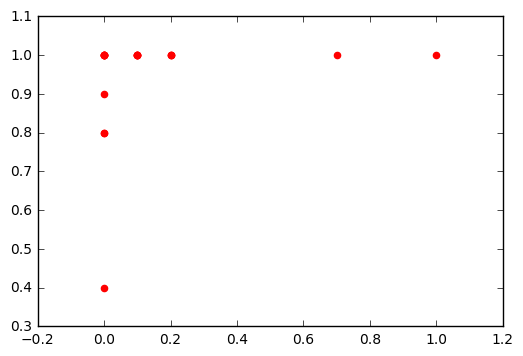



PLOTTING ROC FOR CASE: 23


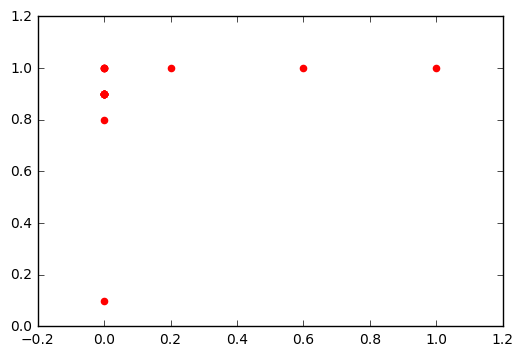



PLOTTING ROC FOR CASE: 24


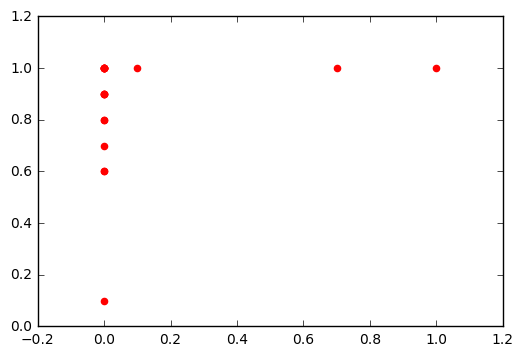



PLOTTING ROC FOR CASE: 25


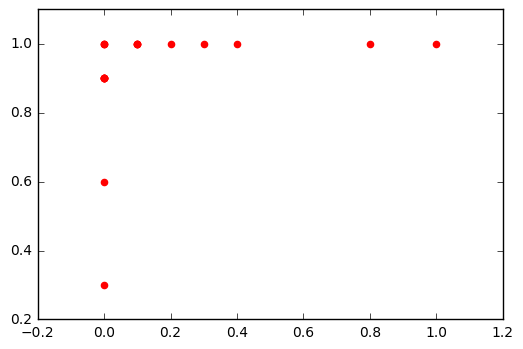



PLOTTING ROC FOR CASE: 26


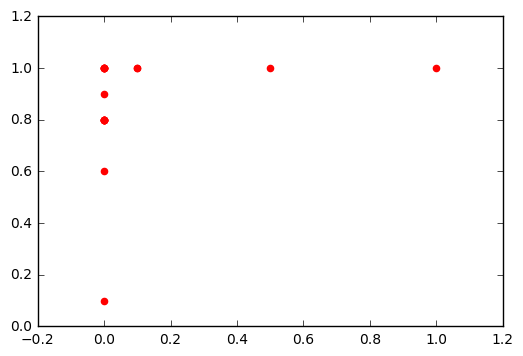



PLOTTING ROC FOR CASE: 27


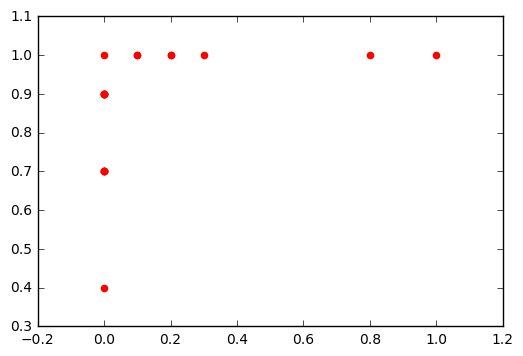



PLOTTING ROC FOR CASE: 28


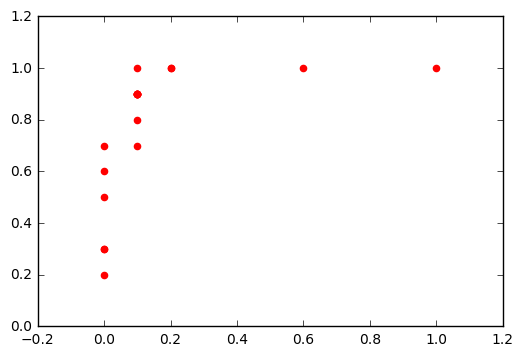



PLOTTING ROC FOR CASE: 29


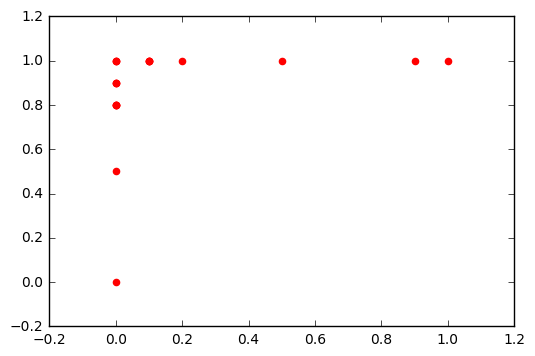



PLOTTING ROC FOR CASE: 30


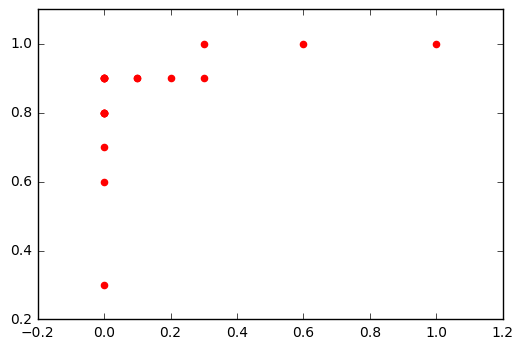



PLOTTING ROC FOR CASE: 31


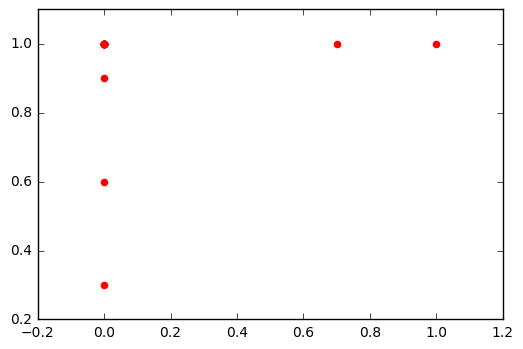



PLOTTING ROC FOR CASE: 32


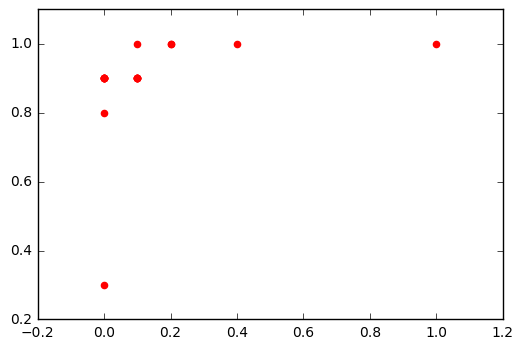



PLOTTING ROC FOR CASE: 33


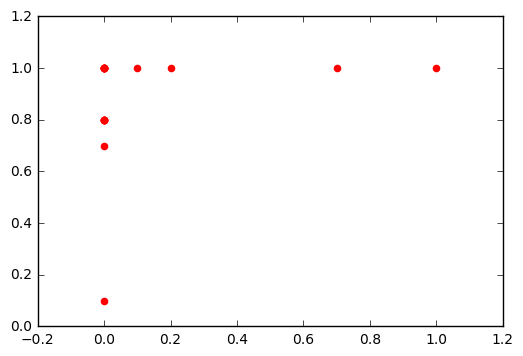



PLOTTING ROC FOR CASE: 34


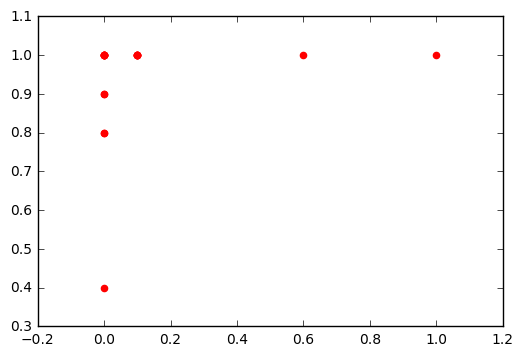



PLOTTING ROC FOR CASE: 35


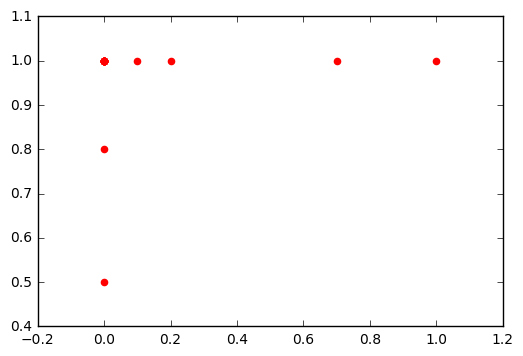



PLOTTING ROC FOR CASE: 36


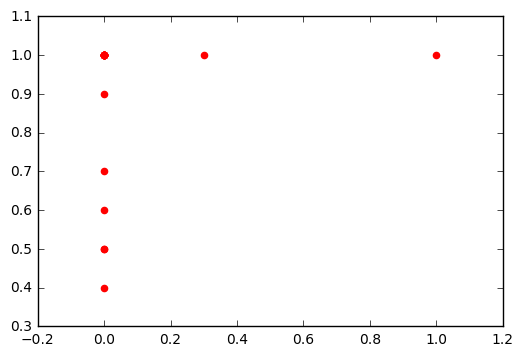



PLOTTING ROC FOR CASE: 37


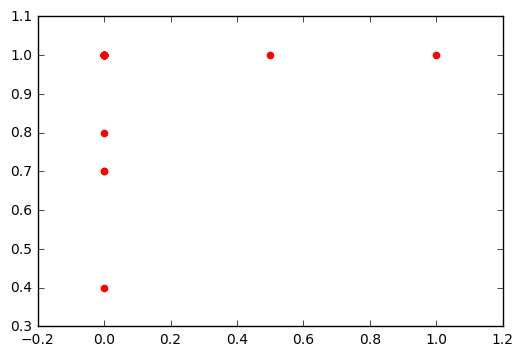



PLOTTING ROC FOR CASE: 38


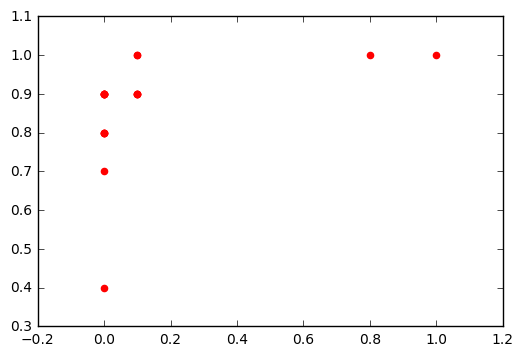



PLOTTING ROC FOR CASE: 39


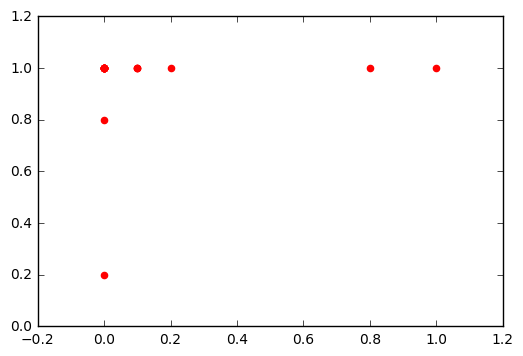



PLOTTING ROC FOR CASE: 40


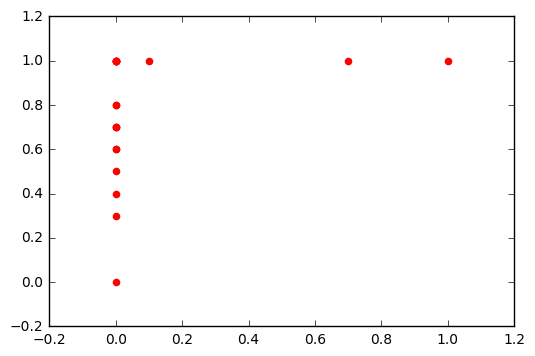



PLOTTING ROC FOR CASE: 41


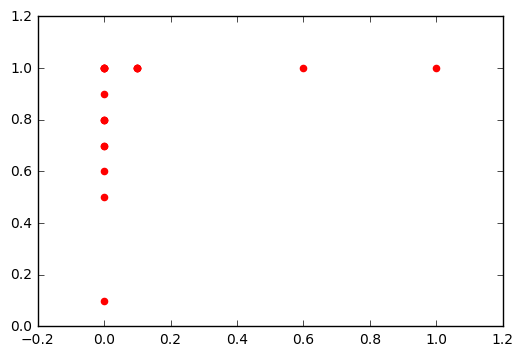



PLOTTING ROC FOR CASE: 42


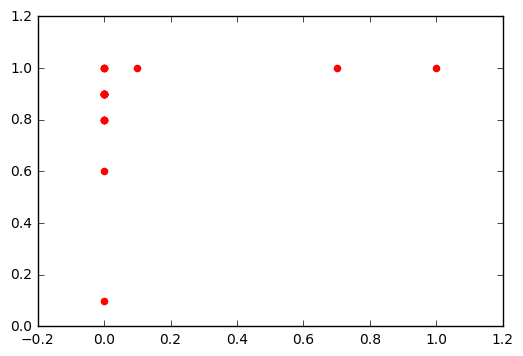



PLOTTING ROC FOR CASE: 43


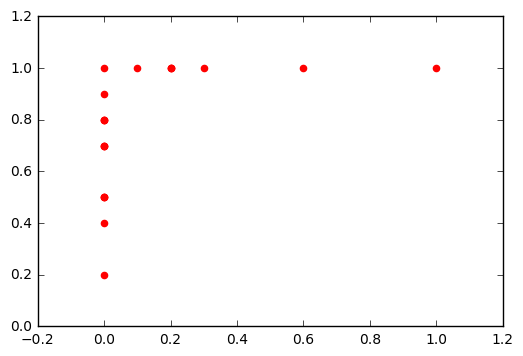



PLOTTING ROC FOR CASE: 44


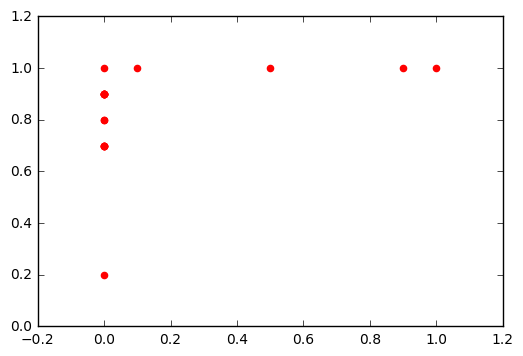



PLOTTING ROC FOR CASE: 45


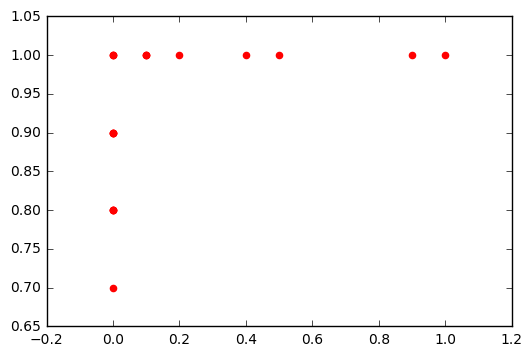



PLOTTING ROC FOR CASE: 46


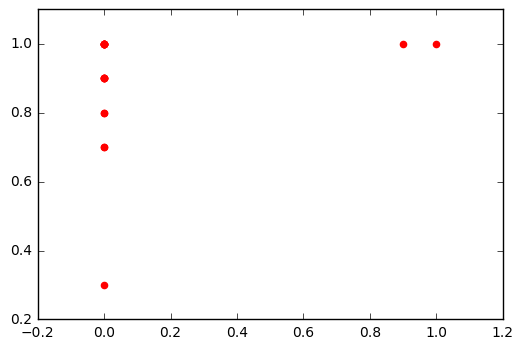



PLOTTING ROC FOR CASE: 47


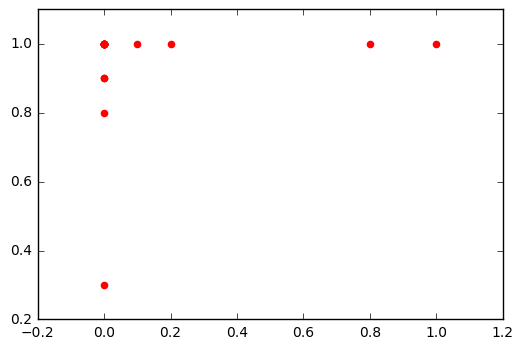



PLOTTING ROC FOR CASE: 48


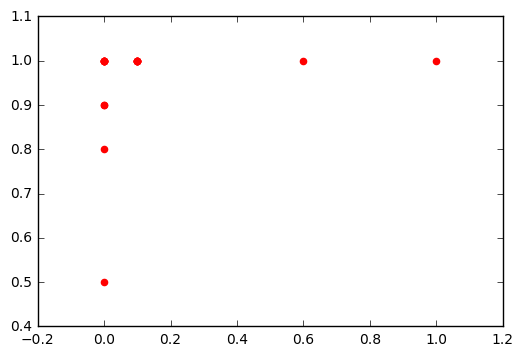



PLOTTING ROC FOR CASE: 49


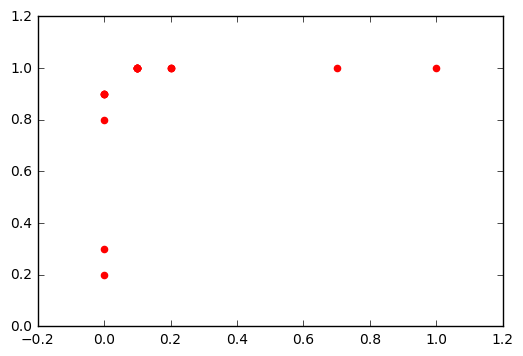



PLOTTING ROC FOR CASE: 50


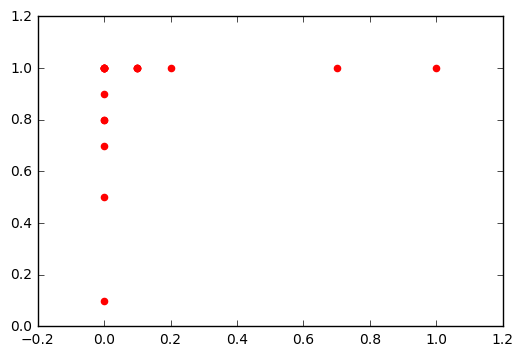

In [3]:
sample_size = min(positive_length, negative_length)
# all_TPRs and all_FPRs will be used later to evalute confidence intervals for each threshold level
all_TPRs = [[None for _ in range(sample_size)] for _ in range(len(thresholds))]
all_FPRs = [[None for _ in range(sample_size)] for _ in range(len(thresholds))]



for j in range(0, sample_size):
    current_positive_sample = positive_data[j]
    TPRs = [None] * len(thresholds)

    current_negative_sample = negative_data[j]
    FPRs = [None] * len(thresholds)

    for i in range(0, len(thresholds)):
        test_positive = current_positive_sample[current_positive_sample >= thresholds[i]]
        tpr = len(test_positive) / len(current_positive_sample)
        TPRs[i] = tpr # This is the calculated TPR value for threshold level i in sample j 
        all_TPRs[i][j] = tpr # The calculated TPR value is also added to all_TPR values for this threshold.(Used later to calculate confidence intervals)
        
        test_negative = current_negative_sample[current_negative_sample >= thresholds[i]]
        fpr = len(test_negative) / len(current_negative_sample)
        FPRs[i] = fpr # This is the calculated FPR value for threshold level i in sample j 
        all_FPRs[i][j] = fpr

    print('\n\nPLOTTING ROC FOR CASE: {}'.format(j))
    plt.scatter(FPRs, TPRs, color='red')
    plt.show() 

In [4]:
import scipy as sp
import scipy.stats

# Function to calculate confidence interval. By default it calculated 80%.
def mean_confidence_interval(data, confidence=0.8):
    a = 1.0*numpy.array(data)
    n = len(a)
    m, se = numpy.mean(a), scipy.stats.sem(a)
    h = se * sp.stats.t._ppf((1+confidence)/2., n-1)
    return m, max(0.0, m-h), min(1.0 ,m+h)

# Calculating and printing Confidence Intervals for all threshold values.

thresh_s = []
ci_lower_TPR = []
ci_lower_FPR = []
ci_TPR_diff = []
ci_upper_TPR = []
ci_upper_FPR = []
ci_FPR_diff = []

print("\n\nConfidence Intervals for TPRs:")
for i in range(0, len(thresholds)):
    mean_tpr, lower_tpr, upper_tpr = mean_confidence_interval(all_TPRs[i])
    thresh = round(thresholds[i],2)
    thresh_s.append(thresh)
    diff = upper_tpr - lower_tpr
    ci_TPR_diff.append(diff)
    ci_lower_TPR.append(lower_tpr)
    ci_upper_TPR.append(upper_tpr)
    print("80% Confidence Interval of TPR with threshold {} is: {} to {}".format(thresh, lower_tpr, upper_tpr))

print("\n\nConfidence Intervals for FPRs:")
for i in range(0, len(thresholds)):
    mean_fpr, lower_fpr, upper_fpr = mean_confidence_interval(all_FPRs[i])
    thresh = round(thresholds[i],2)
    diff = upper_fpr - lower_fpr
    ci_FPR_diff.append(diff)
    ci_lower_FPR.append(lower_fpr)
    ci_upper_FPR.append(upper_fpr)
    print("80% Confidence Interval of FPR with threshold {} is: {} to {}".format(thresh, lower_fpr, upper_fpr))



Confidence Intervals for TPRs:
80% Confidence Interval of TPR with threshold 0.0 is: 1.0 to 1.0
80% Confidence Interval of TPR with threshold 0.05 is: 1.0 to 1.0
80% Confidence Interval of TPR with threshold 0.1 is: 1.0 to 1.0
80% Confidence Interval of TPR with threshold 0.15 is: 0.9954927182470996 to 1.0
80% Confidence Interval of TPR with threshold 0.2 is: 0.9872190210079579 to 0.9970947044822382
80% Confidence Interval of TPR with threshold 0.25 is: 0.9776343253263234 to 0.9909931256540688
80% Confidence Interval of TPR with threshold 0.3 is: 0.9753512308132526 to 0.9893546515396887
80% Confidence Interval of TPR with threshold 0.35 is: 0.970877240366699 to 0.9859855047313404
80% Confidence Interval of TPR with threshold 0.4 is: 0.9622195907537263 to 0.978956879834509
80% Confidence Interval of TPR with threshold 0.45 is: 0.9498254952067332 to 0.9717431322442472
80% Confidence Interval of TPR with threshold 0.5 is: 0.9398454699365826 to 0.9621153143771428
80% Confidence Interval 

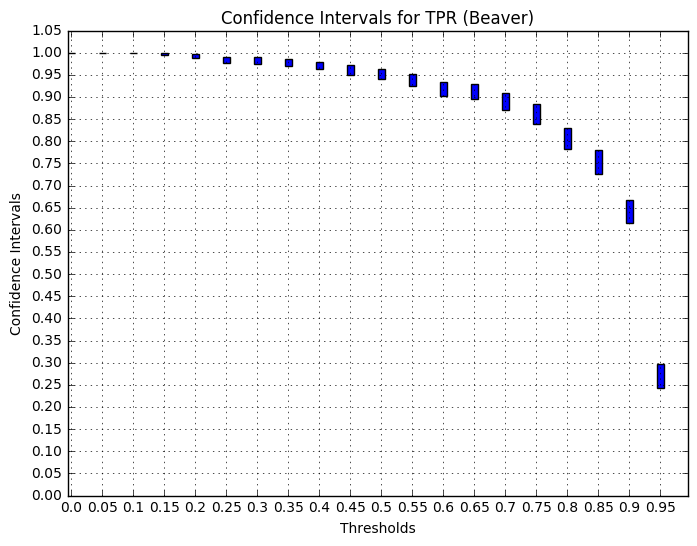

In [5]:
# Plotting Confidence Intervals for TPR.
import pylab

N = len(thresh_s)
ind = numpy.arange(N)    # the x locations for the groups
width = 0.25       # the width of the bars: can also be len(x) sequence

fig = plt.figure(figsize=(8,6))
p2 = plt.bar(ind, ci_TPR_diff, width, color='B',
             bottom=ci_lower_TPR)

plt.ylabel('Confidence Intervals')
plt.xlabel('Thresholds')
plt.title('Confidence Intervals for TPR (Beaver)')
plt.xticks(ind + width/2., thresh_s)
plt.yticks(numpy.arange(0, 1.1, 0.05))
plt.grid()
pylab.savefig('CI_TPR_Beaver.png')
plt.show()

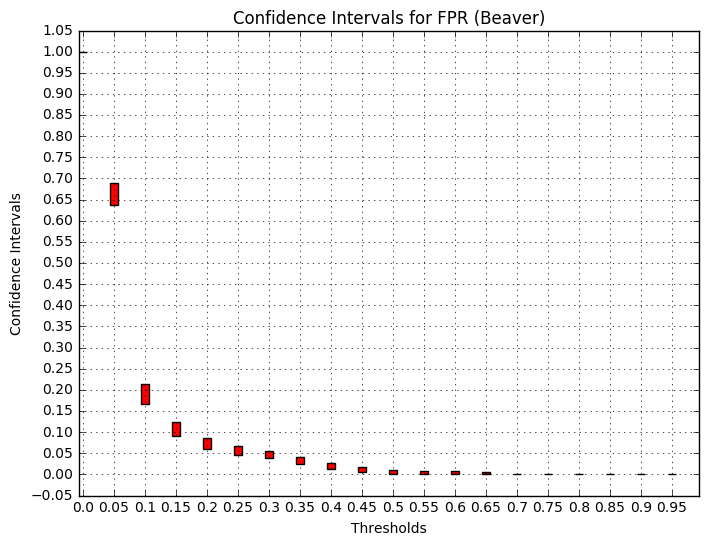

In [6]:
# Plotting Confidence Intervals for FPR.

fig = plt.figure(figsize=(8,6))
p2 = plt.bar(ind, ci_FPR_diff, width, color='R',
             bottom=ci_lower_FPR)

plt.ylabel('Confidence Intervals')
plt.xlabel('Thresholds')
plt.title('Confidence Intervals for FPR (Beaver)')
plt.xticks(ind + width/2., thresh_s)
plt.yticks(numpy.arange(-0.05, 1.1, 0.05))
plt.grid()
pylab.savefig('CI_FPR_Beaver.png')
plt.show()